In [1]:
import matplotlib.pyplot as plt
import numpy
from pathlib import Path
import rasterio
import xarray as xr

%matplotlib inline

### GeoTiff File

In [2]:
geotiffs_dir = Path('/Users/sallen/Documents/MIDOSS/ShipTrackDensityGeoTIFFs/')
dataset = rasterio.open('oct2/ferry_2018_08.tif')
density = dataset.read()  # just for shape

### SalishSeaCast Mesh File

In [3]:
mesh = xr.open_dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')

### Find the WaterMask

In [4]:
coarsen = 1 # for fast testing, production this needs to be 1
countpts = numpy.empty_like(density[0])
for xx in range(0, density.shape[1], coarsen):
    if int(xx/10)*10 == xx:
        print(xx)
    for yy in range(0, density.shape[2], coarsen):
        (llx, lly) = rasterio.transform.xy(dataset.transform, 
                                       xx+0.5, yy-0.5)
        (urx, ury) = rasterio.transform.xy(dataset.transform, 
                                       xx-0.5, yy+0.5)
        inner_points = (numpy.where(mesh.glamt[0] > llx, 1, 0) * 
                numpy.where(mesh.glamt[0] < urx, 1, 0) *
               numpy.where(mesh.gphit[0] > lly, 1, 0) * 
                numpy.where(mesh.gphit[0] < ury, 1, 0) *
                numpy.where(mesh.tmask[0, 0] == 1, 1, 0))
        countpts[xx, yy] = inner_points.sum()
watermask = numpy.where(countpts > 0, True, False)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480


In [5]:
numpy.save('watermask.npy', watermask)

### Plot

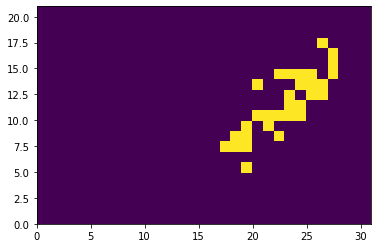

In [8]:
plt.pcolormesh(watermask[::coarsen, ::coarsen]);

Image when run with coarsen=1

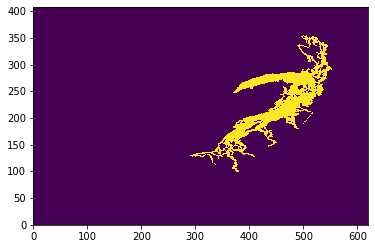